In [1]:
# Self Play Experiment

In [1]:
from MCTS import MCTS
from TSP import TSPGame
from NETS import RecurrentNN, create_training_set, ConvolutionalNN, GraphConvolutionalNN
from EVALUATE import evaluation_run, plot_comparison, create_comparison
from SELFPLAY import Coach
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class dotdict(dict):
    def __getattr__(self, name):
        return self[name]

In [125]:
num_node = 7
numAssess = 300
# numEps = 10
validation_split = 0.2
numGens = 30
patience = 15
maxTrain = 3000

args = dotdict({
    # MCTS args
    'numMCTSSims': 500,        # Number of games moves for MCTS to simulate in self-play
    'num_node': num_node,              # Number of nodes in the graph (game)
    'cpuct': 1,
    
    # Self Play
#     'numEps': numEps,
    'numAssess': numAssess,
    'numGens': numGens,
    'winThresh': 1.0,          # 1 Thresh means replace on any total improvement
    'maxTrain': maxTrain

    })

rnn_args = dotdict({
    # State representation
    'history': True,           # Whether state representation should be a history of states - used for lstm
    'history_length': None,     # If None full history
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 20,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

cnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 100,
    'batch_size': 64,
    'num_channels': 256,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'epochs': 100,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args.update(args)
cnn_args.update(args)
rnn_args.update(args)

In [181]:
def plot_arena(res):
    fig, ax = plt.subplots(2, figsize=(9,12))
    ax[0].set_title("Pi Val Loss")
    ax[1].set_title("V Val Loss")
    ax[0].set_ylabel("loss")
    ax[1].set_ylabel("loss")
    ax[0].set_xlabel("epochs")
    ax[1].set_xlabel("epochs")

    for i in res:
        if type(i) is not dict: i = i.history
        ax[0].plot( i['pi_loss'], linewidth=0.5)
        ax[1].plot( i['v_loss'], linewidth=0.5)

In [126]:
# Create RNN
rnn = RecurrentNN(rnn_args)
gnn = GraphConvolutionalNN(gnn_args)
cnn = ConvolutionalNN(cnn_args)

In [5]:
# Self-Train

In [6]:
c = Coach(gnn, gnn_args)

In [7]:
%%time
gnn_arena = c.arena()

Generation 0
Creating samples...
264 New Samples Generated.
Training on 1584 samples...


/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/100 Loss - 0.3805418648491845
Epoch 20/100 Loss - 0.3555627154629732
Epoch 30/100 Loss - 0.3446119928141617
Epoch 40/100 Loss - 0.337427823407492
Epoch 50/100 Loss - 0.3321571217850731
Epoch 60/100 Loss - 0.3276747183213377
No improvement - Early Stopping

Generation 1
Creating samples...
273 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Epoch 10/100 Loss - 0.35213449874020764
Epoch 20/100 Loss - 0.33955970858274775
Epoch 30/100 Loss - 0.33597789852565085
Epoch 40/100 Loss - 0.3350396524214196
Epoch 50/100 Loss - 0.33262679481684654
No improvement - Early Stopping

Generation 2
Creating samples...
252 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Epoch 10/100 Loss - 0.32775445600767683
No improvement - Early Stopping

Generation 3
Creating samples...
270 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Epoch 10/100 Loss - 0.3152318018850685
Epoch 20/100 Loss - 0.30060515496157214
Epoch 30/100 Loss - 0.3000784238796

In [10]:
# Save
c.nnet.save_model('GNN_SelfPlay')

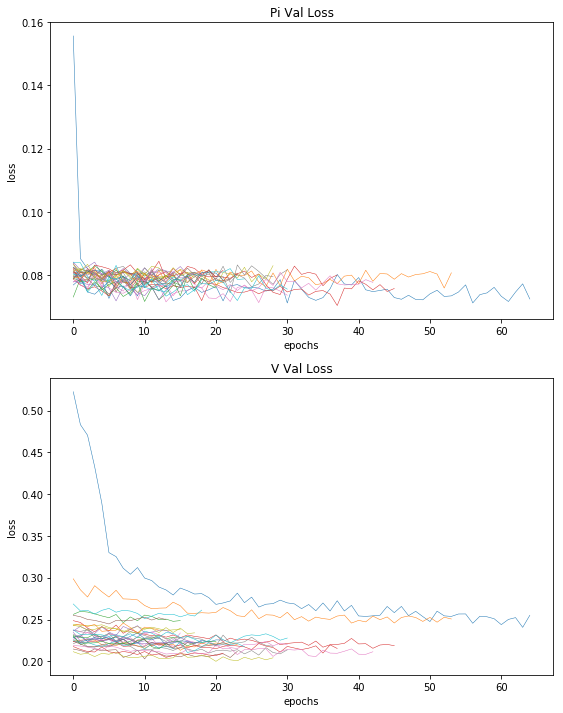

In [182]:
plot_arena(gnn_arena)

In [12]:
c = Coach(rnn, rnn_args)

In [13]:
%%time
rnn_arena = c.arena()

Generation 0
Creating samples...
283 New Samples Generated.
Training on 1698 samples...
Training...
Train on 1358 samples, validate on 340 samples
Epoch 1/20
1358/1358 [==============================] - 3s 2ms/step - loss: 2.4264 - pi_loss: 1.8496 - v_loss: 0.5768 - val_loss: 2.2704 - val_pi_loss: 1.6985 - val_v_loss: 0.5718
Epoch 2/20
1358/1358 [==============================] - 1s 642us/step - loss: 2.1618 - pi_loss: 1.5914 - v_loss: 0.5704 - val_loss: 1.8442 - val_pi_loss: 1.4419 - val_v_loss: 0.4023
Epoch 3/20
1358/1358 [==============================] - 1s 662us/step - loss: 1.5961 - pi_loss: 1.3982 - v_loss: 0.1979 - val_loss: 1.4022 - val_pi_loss: 1.3025 - val_v_loss: 0.0997
Epoch 4/20
1358/1358 [==============================] - 1s 661us/step - loss: 1.3848 - pi_loss: 1.2848 - v_loss: 0.1000 - val_loss: 1.2512 - val_pi_loss: 1.1589 - val_v_loss: 0.0922
Epoch 5/20
1358/1358 [==============================] - 1s 671us/step - loss: 1.2227 - pi_loss: 1.1332 - v_loss: 0.0895 - val_l

2400/2400 [==============================] - 2s 726us/step - loss: 0.0721 - pi_loss: 0.0088 - v_loss: 0.0633 - val_loss: 0.0598 - val_pi_loss: 8.9676e-04 - val_v_loss: 0.0589
Epoch 4/20
2400/2400 [==============================] - 2s 767us/step - loss: 0.0720 - pi_loss: 0.0096 - v_loss: 0.0624 - val_loss: 0.0590 - val_pi_loss: 9.3800e-04 - val_v_loss: 0.0580
Epoch 5/20
2400/2400 [==============================] - 2s 811us/step - loss: 0.0700 - pi_loss: 0.0073 - v_loss: 0.0627 - val_loss: 0.0636 - val_pi_loss: 8.2224e-04 - val_v_loss: 0.0628
Epoch 6/20
2400/2400 [==============================] - 2s 871us/step - loss: 0.0662 - pi_loss: 0.0051 - v_loss: 0.0612 - val_loss: 0.0593 - val_pi_loss: 7.3910e-04 - val_v_loss: 0.0586
Epoch 7/20
2400/2400 [==============================] - 2s 882us/step - loss: 0.0675 - pi_loss: 0.0063 - v_loss: 0.0612 - val_loss: 0.0594 - val_pi_loss: 6.7512e-04 - val_v_loss: 0.0588
Epoch 8/20
2400/2400 [==============================] - 2s 911us/step - loss: 0.0

Epoch 5/20
2400/2400 [==============================] - 2s 902us/step - loss: 0.0606 - pi_loss: 0.0015 - v_loss: 0.0591 - val_loss: 0.0602 - val_pi_loss: 1.5585e-04 - val_v_loss: 0.0600
Epoch 6/20
2400/2400 [==============================] - 2s 931us/step - loss: 0.0620 - pi_loss: 0.0022 - v_loss: 0.0598 - val_loss: 0.0610 - val_pi_loss: 1.4649e-04 - val_v_loss: 0.0608
Epoch 7/20
2400/2400 [==============================] - 2s 959us/step - loss: 0.0606 - pi_loss: 0.0016 - v_loss: 0.0590 - val_loss: 0.0605 - val_pi_loss: 1.3688e-04 - val_v_loss: 0.0604
Epoch 8/20
2400/2400 [==============================] - 2s 965us/step - loss: 0.0599 - pi_loss: 0.0015 - v_loss: 0.0585 - val_loss: 0.0605 - val_pi_loss: 1.3403e-04 - val_v_loss: 0.0604
Epoch 9/20
2400/2400 [==============================] - 2s 960us/step - loss: 0.0605 - pi_loss: 9.8751e-04 - v_loss: 0.0596 - val_loss: 0.0603 - val_pi_loss: 1.2209e-04 - val_v_loss: 0.0601
Epoch 10/20
2400/2400 [==============================] - 2s 962us/

Epoch 7/20
2400/2400 [==============================] - 2s 959us/step - loss: 0.0597 - pi_loss: 8.4363e-04 - v_loss: 0.0589 - val_loss: 0.0576 - val_pi_loss: 4.7809e-05 - val_v_loss: 0.0575
Epoch 8/20
2400/2400 [==============================] - 2s 961us/step - loss: 0.0594 - pi_loss: 5.2399e-04 - v_loss: 0.0589 - val_loss: 0.0610 - val_pi_loss: 4.6479e-05 - val_v_loss: 0.0609
Epoch 9/20
2400/2400 [==============================] - 2s 992us/step - loss: 0.0579 - pi_loss: 5.5599e-04 - v_loss: 0.0573 - val_loss: 0.0588 - val_pi_loss: 4.6118e-05 - val_v_loss: 0.0588
Epoch 10/20
2400/2400 [==============================] - 2s 959us/step - loss: 0.0576 - pi_loss: 4.2732e-04 - v_loss: 0.0572 - val_loss: 0.0585 - val_pi_loss: 4.3958e-05 - val_v_loss: 0.0585
Epoch 11/20
2400/2400 [==============================] - 2s 958us/step - loss: 0.0567 - pi_loss: 5.2484e-04 - v_loss: 0.0561 - val_loss: 0.0587 - val_pi_loss: 4.1857e-05 - val_v_loss: 0.0587
Epoch 12/20
2400/2400 [=========================

2400/2400 [==============================] - 2s 920us/step - loss: 0.0554 - pi_loss: 3.0194e-04 - v_loss: 0.0551 - val_loss: 0.0585 - val_pi_loss: 1.7789e-05 - val_v_loss: 0.0585
Epoch 9/20
2400/2400 [==============================] - 2s 959us/step - loss: 0.0557 - pi_loss: 0.0011 - v_loss: 0.0546 - val_loss: 0.0598 - val_pi_loss: 2.2739e-05 - val_v_loss: 0.0598
Epoch 10/20
2400/2400 [==============================] - 2s 956us/step - loss: 0.0545 - pi_loss: 4.8677e-04 - v_loss: 0.0540 - val_loss: 0.0596 - val_pi_loss: 1.7257e-05 - val_v_loss: 0.0596
Epoch 11/20
2400/2400 [==============================] - 2s 956us/step - loss: 0.0554 - pi_loss: 4.9584e-04 - v_loss: 0.0549 - val_loss: 0.0581 - val_pi_loss: 1.7253e-05 - val_v_loss: 0.0581
Epoch 12/20
2400/2400 [==============================] - 2s 966us/step - loss: 0.0548 - pi_loss: 3.2108e-04 - v_loss: 0.0545 - val_loss: 0.0574 - val_pi_loss: 1.5558e-05 - val_v_loss: 0.0574
Epoch 13/20
2400/2400 [==============================] - 2s 91

2400/2400 [==============================] - 2s 952us/step - loss: 0.0509 - pi_loss: 1.3626e-04 - v_loss: 0.0507 - val_loss: 0.0591 - val_pi_loss: 7.5887e-06 - val_v_loss: 0.0590
Epoch 10/20
2400/2400 [==============================] - 2s 966us/step - loss: 0.0518 - pi_loss: 2.7457e-04 - v_loss: 0.0515 - val_loss: 0.0591 - val_pi_loss: 7.4702e-06 - val_v_loss: 0.0591
Epoch 11/20
2400/2400 [==============================] - 2s 957us/step - loss: 0.0516 - pi_loss: 4.6998e-04 - v_loss: 0.0511 - val_loss: 0.0577 - val_pi_loss: 7.5662e-06 - val_v_loss: 0.0577
Epoch 12/20
2400/2400 [==============================] - 2s 963us/step - loss: 0.0526 - pi_loss: 0.0011 - v_loss: 0.0515 - val_loss: 0.0577 - val_pi_loss: 9.1553e-06 - val_v_loss: 0.0576
Epoch 13/20
2400/2400 [==============================] - 2s 944us/step - loss: 0.0522 - pi_loss: 2.8573e-04 - v_loss: 0.0519 - val_loss: 0.0574 - val_pi_loss: 6.6086e-06 - val_v_loss: 0.0574
Epoch 14/20
2400/2400 [==============================] - 2s 9

2400/2400 [==============================] - 2s 1ms/step - loss: 0.0523 - pi_loss: 2.0948e-04 - v_loss: 0.0520 - val_loss: 0.0532 - val_pi_loss: 4.0627e-06 - val_v_loss: 0.0532
Epoch 11/20
2400/2400 [==============================] - 2s 958us/step - loss: 0.0522 - pi_loss: 2.3389e-04 - v_loss: 0.0520 - val_loss: 0.0545 - val_pi_loss: 4.1679e-06 - val_v_loss: 0.0545
Epoch 12/20
2400/2400 [==============================] - 2s 978us/step - loss: 0.0514 - pi_loss: 2.3675e-04 - v_loss: 0.0512 - val_loss: 0.0561 - val_pi_loss: 3.9343e-06 - val_v_loss: 0.0561
Epoch 13/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0521 - pi_loss: 2.8262e-04 - v_loss: 0.0518 - val_loss: 0.0568 - val_pi_loss: 4.8380e-06 - val_v_loss: 0.0568
Epoch 14/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0514 - pi_loss: 7.2870e-05 - v_loss: 0.0514 - val_loss: 0.0569 - val_pi_loss: 4.6819e-06 - val_v_loss: 0.0569
Epoch 15/20
2400/2400 [==============================] - 2s 1ms

2400/2400 [==============================] - 2s 962us/step - loss: 0.0484 - pi_loss: 1.9440e-04 - v_loss: 0.0482 - val_loss: 0.0520 - val_pi_loss: 1.5944e-06 - val_v_loss: 0.0520
Epoch 12/20
2400/2400 [==============================] - 2s 959us/step - loss: 0.0475 - pi_loss: 6.2607e-05 - v_loss: 0.0474 - val_loss: 0.0512 - val_pi_loss: 1.8193e-06 - val_v_loss: 0.0512
Epoch 13/20
2400/2400 [==============================] - 2s 970us/step - loss: 0.0468 - pi_loss: 1.3255e-04 - v_loss: 0.0467 - val_loss: 0.0516 - val_pi_loss: 1.7301e-06 - val_v_loss: 0.0516
Epoch 14/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0463 - pi_loss: 1.0072e-04 - v_loss: 0.0462 - val_loss: 0.0524 - val_pi_loss: 1.5151e-06 - val_v_loss: 0.0524
Epoch 15/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0464 - pi_loss: 2.0672e-04 - v_loss: 0.0462 - val_loss: 0.0522 - val_pi_loss: 1.6493e-06 - val_v_loss: 0.0522
Epoch 16/20
2400/2400 [==============================] - 2s 1

2400/2400 [==============================] - 2s 1ms/step - loss: 0.0480 - pi_loss: 1.7469e-04 - v_loss: 0.0479 - val_loss: 0.0506 - val_pi_loss: 1.4632e-06 - val_v_loss: 0.0506
Epoch 13/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0489 - pi_loss: 5.8128e-04 - v_loss: 0.0483 - val_loss: 0.0509 - val_pi_loss: 1.9271e-06 - val_v_loss: 0.0509
Epoch 14/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0478 - pi_loss: 5.7568e-04 - v_loss: 0.0473 - val_loss: 0.0485 - val_pi_loss: 1.7713e-06 - val_v_loss: 0.0485
Epoch 15/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0498 - pi_loss: 6.9069e-04 - v_loss: 0.0491 - val_loss: 0.0523 - val_pi_loss: 1.9866e-06 - val_v_loss: 0.0523
Epoch 16/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0473 - pi_loss: 2.7195e-04 - v_loss: 0.0470 - val_loss: 0.0512 - val_pi_loss: 4.7781e-06 - val_v_loss: 0.0512
Epoch 17/20
2400/2400 [==============================] - 2s 1ms/ste

2400/2400 [==============================] - 2s 961us/step - loss: 0.0488 - pi_loss: 1.3868e-04 - v_loss: 0.0486 - val_loss: 0.0587 - val_pi_loss: 7.8867e-07 - val_v_loss: 0.0587
Epoch 14/20
2400/2400 [==============================] - 2s 959us/step - loss: 0.0511 - pi_loss: 0.0013 - v_loss: 0.0498 - val_loss: 0.0567 - val_pi_loss: 1.4390e-06 - val_v_loss: 0.0567
Epoch 15/20
2400/2400 [==============================] - 2s 982us/step - loss: 0.0500 - pi_loss: 5.6062e-04 - v_loss: 0.0495 - val_loss: 0.0623 - val_pi_loss: 1.0993e-06 - val_v_loss: 0.0623
Epoch 16/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0507 - pi_loss: 3.6516e-04 - v_loss: 0.0503 - val_loss: 0.0569 - val_pi_loss: 1.1346e-06 - val_v_loss: 0.0569
Epoch 17/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0484 - pi_loss: 9.3478e-05 - v_loss: 0.0483 - val_loss: 0.0571 - val_pi_loss: 1.9051e-06 - val_v_loss: 0.0571
Epoch 18/20
2400/2400 [==============================] - 2s 1ms/s

2400/2400 [==============================] - 2s 969us/step - loss: 0.0493 - pi_loss: 0.0013 - v_loss: 0.0479 - val_loss: 0.0586 - val_pi_loss: 5.0376e-07 - val_v_loss: 0.0586
Epoch 19/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0486 - pi_loss: 8.6791e-05 - v_loss: 0.0485 - val_loss: 0.0539 - val_pi_loss: 4.2349e-07 - val_v_loss: 0.0539
Epoch 20/20
2400/2400 [==============================] - 2s 1ms/step - loss: 0.0479 - pi_loss: 6.4364e-05 - v_loss: 0.0479 - val_loss: 0.0562 - val_pi_loss: 4.5319e-07 - val_v_loss: 0.0562
Epoch 00020: early stopping
Saved model to disk

Generation 21
Creating samples...
258 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Training...
Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 1s 616us/step - loss: 0.0568 - pi_loss: 3.3018e-05 - v_loss: 0.0567 - val_loss: 0.0592 - val_pi_loss: 5.3704e-07 - val_v_loss: 0.0592
Epoch 2/20
2400/2400 [=====================

2400/2400 [==============================] - 3s 1ms/step - loss: 0.0450 - pi_loss: 5.9887e-05 - v_loss: 0.0449 - val_loss: 0.0462 - val_pi_loss: 3.4829e-07 - val_v_loss: 0.0462
Epoch 20/20
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0436 - pi_loss: 5.9355e-05 - v_loss: 0.0435 - val_loss: 0.0445 - val_pi_loss: 3.5942e-07 - val_v_loss: 0.0445
Saved model to disk

Generation 23
Creating samples...
248 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Training...
Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 2s 630us/step - loss: 0.0479 - pi_loss: 1.3722e-04 - v_loss: 0.0477 - val_loss: 0.0468 - val_pi_loss: 2.4329e-07 - val_v_loss: 0.0468
Epoch 2/20
2400/2400 [==============================] - 2s 662us/step - loss: 0.0491 - pi_loss: 0.0014 - v_loss: 0.0477 - val_loss: 0.0507 - val_pi_loss: 7.0572e-07 - val_v_loss: 0.0507
Epoch 3/20
2400/2400 [==============================] - 2s 743us/step - 

2400/2400 [==============================] - 2s 970us/step - loss: 0.0406 - pi_loss: 1.8076e-04 - v_loss: 0.0404 - val_loss: 0.0521 - val_pi_loss: 2.8491e-07 - val_v_loss: 0.0521
Saved model to disk

Generation 25
Creating samples...
245 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Training...
Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 1s 612us/step - loss: 0.0484 - pi_loss: 2.6548e-05 - v_loss: 0.0484 - val_loss: 0.0486 - val_pi_loss: 3.2415e-07 - val_v_loss: 0.0486
Epoch 2/20
2400/2400 [==============================] - 2s 690us/step - loss: 0.0478 - pi_loss: 1.1391e-04 - v_loss: 0.0477 - val_loss: 0.0477 - val_pi_loss: 3.3577e-07 - val_v_loss: 0.0477
Epoch 3/20
2400/2400 [==============================] - 2s 750us/step - loss: 0.0458 - pi_loss: 7.1131e-05 - v_loss: 0.0457 - val_loss: 0.0531 - val_pi_loss: 3.1740e-07 - val_v_loss: 0.0531
Epoch 4/20
2400/2400 [==============================] - 2s 822us/

256 New Samples Generated.
Samples deleted.
Training on 3000 samples...
Training...
Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 1s 601us/step - loss: 0.0498 - pi_loss: 9.3230e-04 - v_loss: 0.0489 - val_loss: 0.0483 - val_pi_loss: 4.5240e-07 - val_v_loss: 0.0483
Epoch 2/20
2400/2400 [==============================] - 2s 638us/step - loss: 0.0485 - pi_loss: 5.4690e-04 - v_loss: 0.0480 - val_loss: 0.0503 - val_pi_loss: 2.9375e-07 - val_v_loss: 0.0503
Epoch 3/20
2400/2400 [==============================] - 2s 709us/step - loss: 0.0474 - pi_loss: 1.6931e-04 - v_loss: 0.0473 - val_loss: 0.0469 - val_pi_loss: 2.5253e-07 - val_v_loss: 0.0469
Epoch 4/20
2400/2400 [==============================] - 2s 762us/step - loss: 0.0474 - pi_loss: 9.4874e-05 - v_loss: 0.0473 - val_loss: 0.0532 - val_pi_loss: 2.6494e-07 - val_v_loss: 0.0532
Epoch 5/20
2400/2400 [==============================] - 2s 814us/step - loss: 0.0480 - pi_loss: 5.2408e-04 - 

2400/2400 [==============================] - 2s 803us/step - loss: 0.0470 - pi_loss: 1.4603e-05 - v_loss: 0.0470 - val_loss: 0.0521 - val_pi_loss: 2.4507e-07 - val_v_loss: 0.0521
Epoch 6/20
2400/2400 [==============================] - 2s 857us/step - loss: 0.0463 - pi_loss: 6.9164e-05 - v_loss: 0.0462 - val_loss: 0.0511 - val_pi_loss: 2.3305e-07 - val_v_loss: 0.0511
Epoch 7/20
2400/2400 [==============================] - 2s 877us/step - loss: 0.0439 - pi_loss: 2.9291e-05 - v_loss: 0.0438 - val_loss: 0.0495 - val_pi_loss: 2.3435e-07 - val_v_loss: 0.0495
Epoch 8/20
2400/2400 [==============================] - 2s 913us/step - loss: 0.0448 - pi_loss: 1.5955e-04 - v_loss: 0.0447 - val_loss: 0.0526 - val_pi_loss: 2.5431e-07 - val_v_loss: 0.0526
Epoch 9/20
2400/2400 [==============================] - 2s 931us/step - loss: 0.0440 - pi_loss: 5.5216e-04 - v_loss: 0.0434 - val_loss: 0.0546 - val_pi_loss: 2.4865e-07 - val_v_loss: 0.0546
Epoch 10/20
2400/2400 [==============================] - 2s 9

In [14]:
# Save
c.nnet.save_model('RNN_SelfPlay')

Saved model to disk


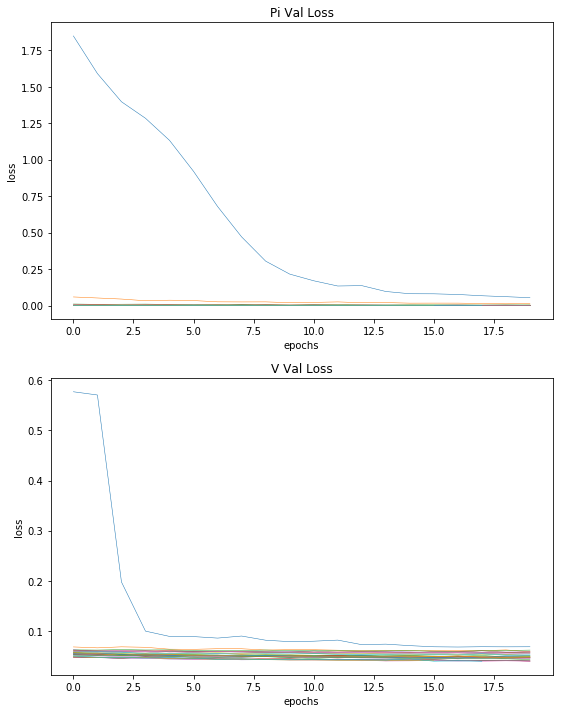

In [183]:
plot_arena(rnn_arena)

In [127]:
c = Coach(cnn, cnn_args)

In [128]:
%%time
cnn_arena = c.arena()

Generation 0
Creating samples...
282 New Samples Generated.
Training on 1692 samples...
Training...
Train on 1353 samples, validate on 339 samples
Epoch 1/100
1353/1353 [==============================] - 12s 9ms/step - loss: 2.7720 - pi_loss: 0.1279 - v_loss: 2.6441 - val_loss: 1.8019 - val_pi_loss: 1.2243 - val_v_loss: 0.5776
Epoch 2/100
1353/1353 [==============================] - 8s 6ms/step - loss: 0.5653 - pi_loss: 8.2145e-04 - v_loss: 0.5645 - val_loss: 1.8678 - val_pi_loss: 1.2902 - val_v_loss: 0.5776
Epoch 3/100
1353/1353 [==============================] - 9s 7ms/step - loss: 0.5602 - pi_loss: 3.9906e-04 - v_loss: 0.5598 - val_loss: 1.9448 - val_pi_loss: 1.3671 - val_v_loss: 0.5776
Epoch 4/100
1353/1353 [==============================] - 9s 7ms/step - loss: 0.5705 - pi_loss: 2.6862e-04 - v_loss: 0.5702 - val_loss: 1.9513 - val_pi_loss: 1.3736 - val_v_loss: 0.5776
Epoch 5/100
1353/1353 [==============================] - 9s 7ms/step - loss: 0.5612 - pi_loss: 3.0370e-04 - v_loss: 

Epoch 44/100
1353/1353 [==============================] - 12s 9ms/step - loss: 0.5184 - pi_loss: 8.0447e-05 - v_loss: 0.5184 - val_loss: 0.5315 - val_pi_loss: 4.0093e-05 - val_v_loss: 0.5315
Epoch 45/100
1353/1353 [==============================] - 11s 8ms/step - loss: 0.5188 - pi_loss: 7.3499e-05 - v_loss: 0.5187 - val_loss: 0.5317 - val_pi_loss: 3.8092e-05 - val_v_loss: 0.5316
Epoch 46/100
1353/1353 [==============================] - 10s 7ms/step - loss: 0.5179 - pi_loss: 7.9742e-05 - v_loss: 0.5179 - val_loss: 0.5338 - val_pi_loss: 3.8603e-05 - val_v_loss: 0.5338
Epoch 47/100
1353/1353 [==============================] - 10s 7ms/step - loss: 0.5171 - pi_loss: 8.6690e-05 - v_loss: 0.5170 - val_loss: 0.5305 - val_pi_loss: 4.7089e-05 - val_v_loss: 0.5305
Epoch 48/100
1353/1353 [==============================] - 11s 8ms/step - loss: 0.5146 - pi_loss: 7.7433e-05 - v_loss: 0.5146 - val_loss: 0.5297 - val_pi_loss: 4.4462e-05 - val_v_loss: 0.5297
Epoch 49/100
1353/1353 [=====================

Epoch 18/100
2400/2400 [==============================] - 18s 7ms/step - loss: 0.5010 - pi_loss: 1.9175e-05 - v_loss: 0.5010 - val_loss: 0.4989 - val_pi_loss: 5.3884e-06 - val_v_loss: 0.4989
Epoch 19/100
2400/2400 [==============================] - 18s 7ms/step - loss: 0.5012 - pi_loss: 1.6533e-05 - v_loss: 0.5011 - val_loss: 0.5002 - val_pi_loss: 6.5035e-06 - val_v_loss: 0.5002
Epoch 20/100
2400/2400 [==============================] - 18s 7ms/step - loss: 0.5009 - pi_loss: 1.9236e-05 - v_loss: 0.5009 - val_loss: 0.4996 - val_pi_loss: 5.9422e-06 - val_v_loss: 0.4996
Epoch 21/100
2400/2400 [==============================] - 20s 8ms/step - loss: 0.5018 - pi_loss: 1.6895e-05 - v_loss: 0.5018 - val_loss: 0.4992 - val_pi_loss: 5.8230e-06 - val_v_loss: 0.4992
Epoch 22/100
2400/2400 [==============================] - 16s 7ms/step - loss: 0.5014 - pi_loss: 1.9783e-05 - v_loss: 0.5014 - val_loss: 0.4988 - val_pi_loss: 6.9638e-06 - val_v_loss: 0.4988
Epoch 23/100
2400/2400 [=====================

Epoch 6/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4935 - pi_loss: 1.8264e-05 - v_loss: 0.4935 - val_loss: 0.4727 - val_pi_loss: 7.3729e-06 - val_v_loss: 0.4727
Epoch 7/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4928 - pi_loss: 1.8521e-05 - v_loss: 0.4928 - val_loss: 0.4725 - val_pi_loss: 5.6964e-06 - val_v_loss: 0.4725
Epoch 8/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4929 - pi_loss: 1.6014e-05 - v_loss: 0.4929 - val_loss: 0.4725 - val_pi_loss: 5.2237e-06 - val_v_loss: 0.4725
Epoch 9/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4930 - pi_loss: 1.4463e-05 - v_loss: 0.4929 - val_loss: 0.4730 - val_pi_loss: 5.4841e-06 - val_v_loss: 0.4730
Epoch 10/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4926 - pi_loss: 1.8028e-05 - v_loss: 0.4926 - val_loss: 0.4726 - val_pi_loss: 4.1474e-06 - val_v_loss: 0.4726
Epoch 11/100
2400/2400 [=========================

Epoch 18/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4839 - pi_loss: 1.0842e-05 - v_loss: 0.4839 - val_loss: 0.4672 - val_pi_loss: 2.1736e-06 - val_v_loss: 0.4672
Epoch 19/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4840 - pi_loss: 1.0245e-05 - v_loss: 0.4840 - val_loss: 0.4677 - val_pi_loss: 3.2182e-06 - val_v_loss: 0.4677
Epoch 20/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4840 - pi_loss: 7.5390e-06 - v_loss: 0.4840 - val_loss: 0.4670 - val_pi_loss: 1.8812e-06 - val_v_loss: 0.4669
Epoch 21/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4842 - pi_loss: 5.7689e-06 - v_loss: 0.4842 - val_loss: 0.4681 - val_pi_loss: 2.6054e-06 - val_v_loss: 0.4681
Epoch 22/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4840 - pi_loss: 5.8778e-06 - v_loss: 0.4840 - val_loss: 0.4673 - val_pi_loss: 2.1859e-06 - val_v_loss: 0.4673
Epoch 23/100
2400/2400 [=====================

Epoch 12/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4855 - pi_loss: 2.3673e-06 - v_loss: 0.4855 - val_loss: 0.5033 - val_pi_loss: 1.7325e-06 - val_v_loss: 0.5033
Epoch 13/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4853 - pi_loss: 8.7241e-06 - v_loss: 0.4853 - val_loss: 0.5026 - val_pi_loss: 2.1547e-06 - val_v_loss: 0.5026
Epoch 14/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4852 - pi_loss: 3.5871e-06 - v_loss: 0.4852 - val_loss: 0.5030 - val_pi_loss: 9.7127e-07 - val_v_loss: 0.5030
Epoch 15/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4853 - pi_loss: 5.7332e-06 - v_loss: 0.4853 - val_loss: 0.5029 - val_pi_loss: 6.0072e-07 - val_v_loss: 0.5029
Epoch 16/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4854 - pi_loss: 5.4482e-06 - v_loss: 0.4854 - val_loss: 0.5026 - val_pi_loss: 2.0196e-06 - val_v_loss: 0.5026
Epoch 17/100
2400/2400 [=====================

Epoch 12/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4869 - pi_loss: 5.0800e-06 - v_loss: 0.4869 - val_loss: 0.4919 - val_pi_loss: 1.2439e-06 - val_v_loss: 0.4919
Epoch 13/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4867 - pi_loss: 3.7158e-06 - v_loss: 0.4867 - val_loss: 0.4915 - val_pi_loss: 1.3778e-06 - val_v_loss: 0.4915
Epoch 14/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4867 - pi_loss: 4.7515e-06 - v_loss: 0.4867 - val_loss: 0.4915 - val_pi_loss: 1.2040e-06 - val_v_loss: 0.4915
Epoch 15/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4868 - pi_loss: 4.7871e-06 - v_loss: 0.4868 - val_loss: 0.4919 - val_pi_loss: 1.2616e-06 - val_v_loss: 0.4919
Epoch 16/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4868 - pi_loss: 5.7248e-06 - v_loss: 0.4868 - val_loss: 0.4918 - val_pi_loss: 6.7542e-07 - val_v_loss: 0.4918
Epoch 17/100
2400/2400 [=====================

Epoch 32/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4914 - pi_loss: 2.4458e-06 - v_loss: 0.4914 - val_loss: 0.4844 - val_pi_loss: 5.5929e-07 - val_v_loss: 0.4844
Epoch 33/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4913 - pi_loss: 2.0674e-06 - v_loss: 0.4913 - val_loss: 0.4844 - val_pi_loss: 6.3191e-07 - val_v_loss: 0.4844
Epoch 34/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4915 - pi_loss: 2.6722e-06 - v_loss: 0.4915 - val_loss: 0.4846 - val_pi_loss: 1.0340e-06 - val_v_loss: 0.4846
Epoch 35/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4914 - pi_loss: 3.4767e-06 - v_loss: 0.4914 - val_loss: 0.4847 - val_pi_loss: 9.2438e-07 - val_v_loss: 0.4847
Epoch 36/100
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4915 - pi_loss: 4.2767e-06 - v_loss: 0.4915 - val_loss: 0.4844 - val_pi_loss: 1.6203e-06 - val_v_loss: 0.4844
Epoch 37/100
2400/2400 [=====================

KeyboardInterrupt: 

In [184]:
# Save
c.nnet.save_model('CNN_SelfPlay')

Saved model to disk


In [ ]:
plot_arena(cnn_arena)

In [ ]:
# Compare Models

In [185]:
%%time

args['numMCTSSims']=3000

game_list = [TSPGame(args) for i in range(100)]

nets = {"No NN": None, 
        'GNN': gnn,
        'LSTM':rnn}
#         'CNN':cnn}

res = create_comparison(game_list, nets, args)

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...92...93...94...95...96...97...98...99...
CPU times: user 20min 33s, sys: 31.3 s, total: 21min 4s
Wall time: 20min 9s


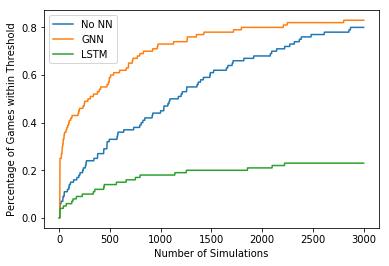

In [186]:
plot_comparison(res)